# Práctica 1C - Inteligencia Artificial
## Belén Díaz Agudo -  Facultad de Informática UCM
## Búsqueda local
En esta primera parte usaremos ejercicios paso a paso para familiarizarnos con la resolución de problemas sencillos de optimización, como la maximización o minimización de una función, o el problema de la mochila o del viajante, problemas conocidos cuya resolución se ha abordado con técnicas algorítmicas y que vamos a resolver utilizando algoritmos de búsqueda local. En la segunda parte de la práctica se pide resolver el problema de la organización de jornadas informáticas dado en el enunciado.

## Parte 1. Algoritmo de escalada
Hill Climbing es un algoritmo de búsqueda local heurística utilizada para problemas de optimización.
Esta solución puede o no ser el óptimo global. El algoritmo es una variante del algoritmo de generación y prueba.
<br>
En general, el algoritmo funciona de la siguiente manera:
- Evaluar el estado inicial.
- Si es igual al estado del objetivo, terminamos.
- Encuentra un estado vecino al estado actual
- Evaluar este estado. Si está más cerca del estado objetivo que antes, reemplace el estado inicial con este estado y repita estos pasos.
<br>
Usaremos la implementación de AIMA que está en el módulo search.py

    def hill_climbing(problem):
        """From the initial node, keep choosing the neighbor with highest value,
        stopping when no neighbor is better. [Figure 4.2]"""
        current = Node(problem.initial)
        while True:
            neighbors = current.expand(problem)
            if not neighbors:
                break
            neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
            if problem.value(neighbor.state) <= problem.value(current.state):
                break
            current = neighbor
        return current.state


### TSP (Travelling Salesman Problem): el problema del viajante
Dado un conjunto de ciudades y la distancia entre cada par de ciudades, el problema es encontrar la ruta más corta posible que visite cada ciudad exactamente una vez y regrese al punto de partida. Es un problema NP hard. No existen una solución de coste polinomial. 

In [1]:
##Resolvereremos el problema del viajante TSP para encontrar una solución aproximada.
from search import *

class TSP_problem(Problem):

    def two_opt(self, state):
        """ Neighbour generating function for Traveling Salesman Problem """
        neighbour_state = state[:]
        left = random.randint(0, len(neighbour_state) - 1)
        right = random.randint(0, len(neighbour_state) - 1)
        if left > right:
            left, right = right, left
        neighbour_state[left: right + 1] = reversed(neighbour_state[left: right + 1])
        return neighbour_state

    def actions(self, state):
        """ action that can be excuted in given state """
        return [self.two_opt]

    def result(self, state, action):
        """  result after applying the given action on the given state """
        return action(state)

    def path_cost(self, c, state1, action, state2):
        """ total distance for the Traveling Salesman to be covered if in state2  """
        cost = 0
        for i in range(len(state2) - 1):
            cost += distances[state2[i]][state2[i + 1]]
        cost += distances[state2[0]][state2[-1]]
        return cost

    def value(self, state):
        """ value of path cost given negative for the given state """
        return -1 * self.path_cost(None, None, None, state)

In [2]:
## Resolveremos el TSP para las ciudades de la lista de ciudades de Rumanía.
## ['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']

In [3]:
# Usaremos la siguiente representacion del libro AIMA para el mapa de Rumanía.

romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

Es bastante sencillo entender este `romania_map`. El primer nodo ** Arad ** tiene tres vecinos llamados ** Zerind **, ** Sibiu **, ** Timisoara **. Cada uno de estos nodos son 75, 140, 118 unidades aparte de ** Arad ** respectivamente. Y lo mismo ocurre con otros nodos.

Y `romania_map.locations` contiene las posiciones de cada uno de los nodos. 
Como heurística se puede usar la distancia en línea recta o la distancia manhattan (que es diferente de la proporcionada en `romania_map`) entre dos ciudades.

In [4]:
romania_locations = romania_map.locations
print(romania_locations)

{'Arad': (91, 492), 'Bucharest': (400, 327), 'Craiova': (253, 288), 'Drobeta': (165, 299), 'Eforie': (562, 293), 'Fagaras': (305, 449), 'Giurgiu': (375, 270), 'Hirsova': (534, 350), 'Iasi': (473, 506), 'Lugoj': (165, 379), 'Mehadia': (168, 339), 'Neamt': (406, 537), 'Oradea': (131, 571), 'Pitesti': (320, 368), 'Rimnicu': (233, 410), 'Sibiu': (207, 457), 'Timisoara': (94, 410), 'Urziceni': (456, 350), 'Vaslui': (509, 444), 'Zerind': (108, 531)}


In [5]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in romania_map.locations.keys()}
node_positions = romania_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in romania_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

romania_graph_data = {  'graph_dict' : romania_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

In [11]:
from IPython.display import HTML
from IPython.display import display
from PIL import Image
from matplotlib import lines
import ipywidgets as widgets
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [12]:
def show_map(graph_data, node_colors=None):
    G = nx.Graph(graph_data['graph_dict'])
    node_colors = node_colors or graph_data['node_colors']
    node_positions = graph_data['node_positions']
    node_label_pos = graph_data['node_label_positions']
    edge_weights = graph_data['edge_weights']

    # set the size of the plot
    plt.figure(figsize=(18, 13))
    # draw the graph (both nodes and edges) with locations from romania_locations
    nx.draw(G, pos={k: node_positions[k] for k in G.nodes()},
            node_color=[node_colors[node] for node in G.nodes()], linewidths=0.3, edgecolors='k')

    # draw labels for nodes
    node_label_handles = nx.draw_networkx_labels(G, pos=node_label_pos, font_size=14)

    # add a white bounding box behind the node labels
    [label.set_bbox(dict(facecolor='white', edgecolor='none')) for label in node_label_handles.values()]

    # add edge lables to the graph
    nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_weights, font_size=14)

    # add a legend
    white_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="white")
    orange_circle = lines.Line2D([], [], color="orange", marker='o', markersize=15, markerfacecolor="orange")
    red_circle = lines.Line2D([], [], color="red", marker='o', markersize=15, markerfacecolor="red")
    gray_circle = lines.Line2D([], [], color="gray", marker='o', markersize=15, markerfacecolor="gray")
    green_circle = lines.Line2D([], [], color="green", marker='o', markersize=15, markerfacecolor="green")
    plt.legend((white_circle, orange_circle, red_circle, gray_circle, green_circle),
               ('Un-explored', 'Frontier', 'Currently Exploring', 'Explored', 'Final Solution'),
               numpoints=1, prop={'size': 16}, loc=(.8, .75))

    # show the plot. No need to use in notebooks. nx.draw will show the graph itself.
    plt.show()

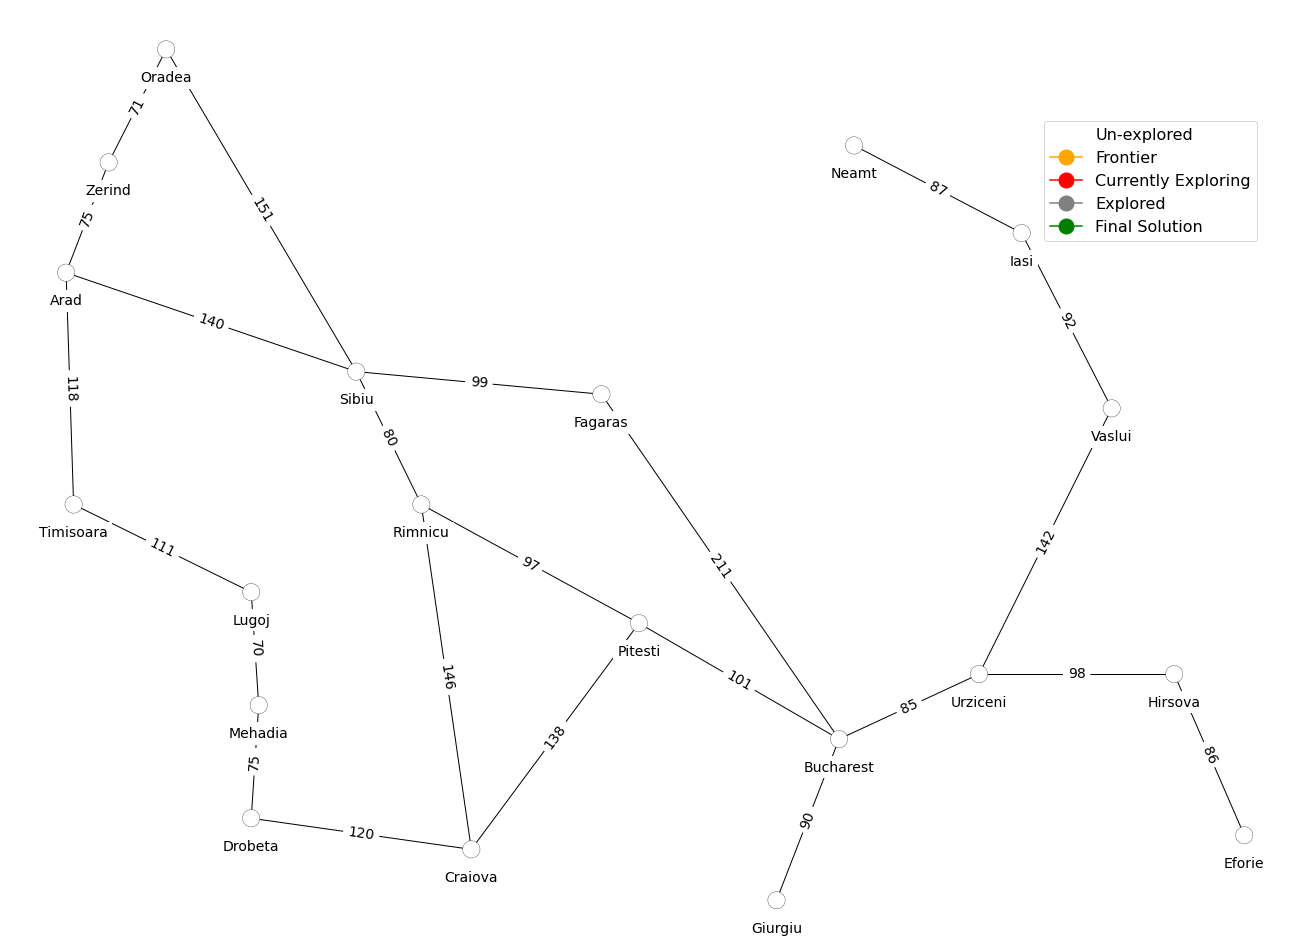

In [13]:
show_map(romania_graph_data)

In [ ]:
## el siguiente código crea un diccionario y calcula y añade al diccionario la distancia manhattan entre las ciudades. 
import numpy as np

distances = {}
all_cities = []

for city in romania_map.locations.keys():
    distances[city] = {}
    all_cities.append(city)
    
all_cities.sort()
print(all_cities)

for name_1, coordinates_1 in romania_map.locations.items():
        for name_2, coordinates_2 in romania_map.locations.items():
            distances[name_1][name_2] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])
            distances[name_2][name_1] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])

In [ ]:
# Creamos una instancia del problema TSP con la lista de ciudades anterior que se na extraido del mapa.
# En el mapa hay informacion de las distancias que se utilizan en la clase TSP_problem para calcular el coste y las heurísticas.
tsp = TSP_problem(all_cities)

In [ ]:
## Redefinimos el hill climbing de AIMA para que el método de generacion de vecinos sea acceder al grafo que hemos definido para el TSP

def hill_climbing(problem):
    
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    
    def find_neighbors(state, number_of_neighbors=100):
        """ finds neighbors using two_opt method """
        
        neighbors = []
        
        for i in range(number_of_neighbors):
            new_state = problem.two_opt(state)
            neighbors.append(Node(new_state))
            state = new_state
            
        return neighbors

    # as this is a stochastic algorithm, we will set a cap on the number of iterations
    iterations = 10000
    
    current = Node(problem.initial)
    while iterations:
        neighbors = find_neighbors(current.state)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            current.state = neighbor.state
        iterations -= 1
        
    return current.state

In [ ]:
# Y lo resolvemos con escalada. 
hill_climbing(tsp)

### Ejercicio 1. Resuelve el problema TSP con el algoritmo de escalada por máxima pendiente en el mapa de ciudades de Rumanía y explica el resultado obtenido. 

Realiza un análisis razonado de las propiedades del algoritmo: eficiencia y optimalidad en base a la ejecución. 

¿Ha encontrado el algoritmo el óptimo global? 
¿Ha encontrado la misma solución en distintas ejecuciones?

Sólo se pide hacer una comparativa teórica (breve) con cómo se comporta este algoritmo y relacionarlo con otros algoritmos vistos en clase. 

Opcionalmente se puede hacer la comparativa real con algún algoritmo de búsqueda exhaustiva. 


## Parte 2. Enfriamiento simulado ( simulated annealing) 
El algoritmo de enfriamiento simulado puede manejar las situaciones de óptimo local o mesetas típicas en algoritmos de escalada.
<br>
El enfriamiento simulado es bastante similar a la escalada pero en lugar de elegir el mejor movimiento en cada iteración, elige un movimiento aleatorio. Si este movimiento aleatorio nos acerca al óptimo global, será aceptado,
pero si no lo hace, el algoritmo puede aceptar o rechazar el movimiento en función de una probabilidad dictada por la temperatura.  Cuando la `temperatura` es alta, es más probable que el algoritmo acepte un movimiento aleatorio incluso si es malo. A bajas temperaturas, solo se aceptan buenos movimientos, con alguna excepción ocasional.
Esto permite la exploración del espacio de estado y evita que el algoritmo se atasque en el óptimo local.

    Usaremos la implementación de AIMA del modulo search.py
    
    def simulated_annealing(problem, schedule=exp_schedule()):
    """[Figure 4.5] CAUTION: This differs from the pseudocode as it
    returns a state instead of a Node."""
    current = Node(problem.initial)
    for t in range(sys.maxsize):
        T = schedule(t)
        if T == 0:
            return current.state
        neighbors = current.expand(problem)
        if not neighbors:
            return current.state
        next_choice = random.choice(neighbors)
        delta_e = problem.value(next_choice.state) - problem.value(current.state)
        if delta_e > 0 or probability(math.exp(delta_e / T)):
            current = next_choice

Como hemos visto en clase hay varios métodos de enfriamiento (scheduling routine) 
Se puede variar el método de enfriamiento. En la implementación actual estamos usando el método de enfriamiento exponencial (que se pasa como parámetro). 

    def exp_schedule(k=20, lam=0.005, limit=100):
        """One possible schedule function for simulated annealing"""
        return lambda t: (k * math.exp(-lam * t) if t < limit else 0)

Como ejemplo, vamos a definir un problema sencillo de encontrar el punto más alto en una rejilla. Este problema está definido en el módulo search.py como PeakFindingProblem. Lo reproducimos aquí y creamos una rejilla simple.

In [ ]:
initial = (0, 0)
grid = [[3, 7, 2, 8], [5, 2, 9, 1], [5, 3, 3, 1]]

In [ ]:
# Pre-defined actions for PeakFindingProblem
directions4 = { 'W':(-1, 0), 'N':(0, 1), 'E':(1, 0), 'S':(0, -1) }
directions8 = dict(directions4) 
directions8.update({'NW':(-1, 1), 'NE':(1, 1), 'SE':(1, -1), 'SW':(-1, -1) })

class PeakFindingProblem(Problem):
    """Problem of finding the highest peak in a limited grid"""

    def __init__(self, initial, grid, defined_actions=directions4):
        """The grid is a 2 dimensional array/list whose state is specified by tuple of indices"""
        Problem.__init__(self, initial)
        self.grid = grid
        self.defined_actions = defined_actions
        self.n = len(grid)
        assert self.n > 0
        self.m = len(grid[0])
        assert self.m > 0

    def actions(self, state):
        """Returns the list of actions which are allowed to be taken from the given state"""
        allowed_actions = []
        for action in self.defined_actions:
            next_state = vector_add(state, self.defined_actions[action])
            if next_state[0] >= 0 and next_state[1] >= 0 and next_state[0] <= self.n - 1 and next_state[1] <= self.m - 1:
                allowed_actions.append(action)

        return allowed_actions

    def result(self, state, action):
        """Moves in the direction specified by action"""
        return vector_add(state, self.defined_actions[action])

    def value(self, state):
        """Value of a state is the value it is the index to"""
        x, y = state
        assert 0 <= x < self.n
        assert 0 <= y < self.m
        return self.grid[x][y]


In [ ]:
problem = PeakFindingProblem(initial, grid, directions4)

In [ ]:
# Lo resolvemos con enfriamiento simulado

solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
max(solutions)

In [ ]:
def hill_climbing(problem):
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    current = Node(problem.initial)
    while True:
        neighbors = current.expand(problem)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            break
        current = neighbor
    return current.state

In [ ]:
solution = problem.value(hill_climbing(problem))
solution

### Ejercicio 2.  Resuelve el problema anterior de encontrar el punto máximo en una rejilla. Comenta y razona los resultados obtenidos en distintas rejjillas con los algoritmos de enfriamiento simulado y escalada por máxima pendiente. 
 
 
Ejemplo de rejilla para pruebas

grid = [[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]


## Parte 3. Algoritmos genéticos


Se define una clase ProblemaGenetico que incluye los elementos necesarios para la representación de un problema de optimización que se va a resolver con un algoritmo genético. Los elementos son los que hemos visto en clase:

 - genes: lista de genes usados en el genotipo de los estados.
 - longitud_individuos: longitud de los cromosomas
 - decodifica: función de obtiene el fenotipo a partir del genotipo.
 - fitness: función de valoración.
 - muta: función de mutación de un cromosoma 
 - cruza: función de cruce de un par de cromosomas

In [ ]:
import random

In [ ]:
class ProblemaGenetico(object):
        def __init__(self, genes,fun_dec,fun_muta , fun_cruza, fun_fitness,longitud_individuos):
            self.genes = genes
            self.fun_dec = fun_dec
            self.fun_cruza = fun_cruza
            self.fun_muta = fun_muta
            self.fun_fitness = fun_fitness
            self.longitud_individuos = longitud_individuos
            """Constructor de la clase"""
                
        def decodifica(self, genotipo):
            """Devuelve el fenotipo a partir del genotipo"""
            fenotipo = self.fun_dec(genotipo)
            return fenotipo
        def muta(self, cromosoma,prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob)
            return mutante
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2)
            return cruce 
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma)
            return valoracion

En primer lugar vamos a definir una instancia de la clase anterior correspondiente al problema de optimizar (maximizar o minimizar) la función cuadrado x^2 en el conjunto de los números naturales menores que 2^{10}.
Se usa este ejemplo (del que sabemos la solución) para ver todos los elementos y poder observar el comportamiento. 


In [ ]:
# Será necesaria la siguiente función que interpreta una lista de 0's y 1's como un número natural:  
# La siguiente función que interpreta una lista de 0's y 1's como
# un número natural:  

def binario_a_decimal(x):
    return sum(b*(2**i) for (i,b) in enumerate(x)) 

In [ ]:
list(enumerate([1, 0, 0]))

In [ ]:
# En primer luegar usaremos la clase anterior para representar el problema de optimizar (maximizar o minimizar)
# la función cuadrado en el conjunto de los números naturales menores que
# 2^{10}.

# Tenemos que definir funciones de cruce, mutación y fitness para este problema.

def fun_cruzar(cromosoma1, cromosoma2):
    """Cruza los cromosomas por la mitad"""
    l1 = len(cromosoma1)
    l2 = len(cromosoma2)
    cruce1 = cromosoma1[0:l1//2]+cromosoma2[l1//2:l2]
    cruce2 = cromosoma2[0:l2//2]+cromosoma1[l2//2:l1]
    return [cruce1,cruce2]

def fun_mutar(cromosoma,prob):
    """Elige un elemento al azar del cromosoma y lo modifica con una probabilidad igual a prob"""
    l = len(cromosoma)
    p = random.randint(0,l-1)
    if prob > random.uniform(0,1):
        cromosoma[p] =  (cromosoma[p]+1)%2
    return cromosoma

def fun_fitness_cuad(cromosoma):
    """Función de valoración que eleva al cuadrado el número recibido en binario"""
    n = binario_a_decimal(cromosoma)**2
    return n

cuadrados = ProblemaGenetico([0,1],binario_a_decimal,fun_mutar, fun_cruzar, fun_fitness_cuad,10)

Una vez definida la instancia cuadrados que representa el problema genético, probar alguna de las funciones definidas en la clase anterior, para esta instancia concreta. Por ejemplo:

In [ ]:
cuadrados.decodifica([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1329

In [ ]:
cuadrados.fitness([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1766241

In [ ]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

In [ ]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

In [ ]:
cuadrados.cruza([1,0,0,0,1,1,0,0,1,0,1],[0,1,1,0,1,0,0,1,1,1])
# Posible salida: [[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

### Ejercicio 3

   - Definir una función poblacion_inicial(problema_genetico,tamaño), para definir una población inicial de un tamaño dado, para una instancia dada de la clase anterior ProblemaGenetico

sugerencia: usar random.choice

   - Definir una función de cruce que recibe una instancia de Problema_Genetico y una población de padres (supondremos que hay un número par de padres), obtiene la población resultante de cruzarlos de dos en dos (en el orden en que aparecen)

cruza_padres(problema_genetico,padres)

   - Definir la función de mutación que recibe una instancia de Problema_Genetico, una población y una probabilidad de mutación, obtiene la población resultante de aplicar operaciones de mutación a cada individuo llamando a la función muta definida para el problema genético.
muta_individuos(problema_genetico, poblacion, prob)

In [ ]:
def poblacion_inicial(problema_genetico, size):
    ...           
    return l

In [ ]:
poblacion_inicial(cuadrados,10)

In [ ]:
def cruza_padres(problema_genetico,padres):
    l = []
    ....
    return l

In [ ]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

cruza_padres(cuadrados,p1)
# Posible salida
# [[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
#  [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#  [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
#  [0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
#  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
def muta_individuos(problema_genetico, poblacion, prob):
    # hay que llamar a  problema_genetico.muta(x,prob) para todos los individuos de la poblacion.

In [ ]:
muta_individuos(cuadrados,p1,0.5)
# Posible salida:
#  [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#   [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
#   [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
#   [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
#   [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [ ]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [ ]:
muta_individuos(cuadrados,p1,0.5)

### Ejercicio 4

Se pide definir una función de selección mediante torneo de n individuos de una población.  
La función recibe como entrada:
 - una instancia de la clase ProblemaGenetico
 - una población
 - el número n de individuos que vamos a seleccionar
 - el número k de participantes en el torneo
 - un valor opt que puede ser o la función max o la función min (dependiendo de si el problema es de maximización o de minimización, resp.).

seleccion\_por\_torneo(problema_genetico,poblacion,n,k,opt) 

INDICACIÓN: Usar random.sample para seleccionar k elementos de una secuencia. 
Por ejemplo, random.sample(population=[2,5,7,8,9], k=3) devuelve [7,5,8]. 

In [ ]:
def seleccion_por_torneo(problema_genetico, poblacion, n, k, opt):
    """Selección por torneo de n individuos de una población. Siendo k el nº de participantes
        y opt la función max o min."""
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion,k)
        seleccionado = opt(participantes, key=problema_genetico.fitness)
        opt(poblacion, key=problema_genetico.fitness)
        seleccionados.append(seleccionado)
        # poblacion.remove(seleccionado)
    return seleccionados  

In [ ]:
#Ejemplo
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,max)
# Posible salida: [[1, 1, 1, 1, 1, 0, 0, 0, 1, 1], [1, 0, 0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 1, 1, 0, 1, 1, 1, 0, 1]]


In [ ]:
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,min)
# [[0, 0, 1, 1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0, 1, 0, 1, 0]]

In [ ]:
# La siguiente función implementa una posibilidad para el algoritmo genético completo: 
# inicializa t = 0 
# Generar y evaluar la Población P(t)
# Mientras no hemos llegado al número de generaciones fijado:  t < nGen
#    P1 = Selección por torneo de (1-size)·p individuos de P(t)
#    P2 = Selección por torneo de (size·p) individuos de P(t)
#    Aplicar cruce en la población P2
#    P4 = Union de P1 y P3
#    P(t+1) := Aplicar mutación P4 
#    Evalua la población P(t+1) 
#    t:= t+1
        
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# opt: max ó min, dependiendo si el problema es de maximización o de minimización. 
# nGen: número de generaciones (que se usa como condición de terminación)
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.

def algoritmo_genetico(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar):
    poblacion= poblacion_inicial(problema_genetico,size)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 


Necesitarás definir la función auxiliar nueva_generacion(problema_genetico,poblacion,n_padres,n_directos,prob_mutar) que dada una población calcula la siguiente generación.

In [ ]:
#Definir la función nueva_generacion
def nueva_generacion(problema_genetico, k,opt, poblacion, n_padres, n_directos, prob_mutar):
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k,opt) 
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres , k, opt)
    cruces =  cruza_padres(problema_genetico,padres1)
    generacion = padres2+cruces
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar)
    return resultado_mutaciones

### Ejercicio 5.  Ejecutar el algoritmo genético anterior, para resolver el problema anterior (tanto en minimización como en maximización).  

Hacer una valoración de resultados y comentarios sobre el comportamiento del algoritmmo. 
En la resolución del problema hay que tener en cuenta que el algoritmo genético devuelve un par con el mejor fenotipo encontrado y su valoración.

In [ ]:
algoritmo_genetico(cuadrados,3,min,20,10,0.7,0.1)
# Salida esperada: (0, 0)

In [ ]:
algoritmo_genetico(cuadrados,3,max,20,10,0.7,0.1)
# Salida esperada: (1023, 1046529)

##  El problema de la mochila 

Se plantea el típico problema de la mochila en el que dados n objetos de pesos conocidos pi y valor vi (i=1,...,n) hay que elegir cuáles se meten en una mochila que soporta un peso P máximo. La selección debe hacerse de forma que se máximice el valor de los objetos introducidos sin superar el peso máximo.

### Ejercicio 6
Se pide definir la representación del problema de la mochila usando genes [0,1] y longitud de los individuos n.

Los valores 1 ó 0 representan, respectivamente, si el objeto se introduce o no en la mochila Tomados de izquerda a derecha, a partir del primero que no cabe, se consideran  todos fuera de la mochila,independientemente del gen en su posición. De esta manera, todos los individuos representan candidatos válidos.

El numero de objetos n determina la longitud de los individuos de la población.
En primer lugar es necesario definir una función de decodificación de la mochila que recibe como entrada:
* un cromosoma (en este caso, una lista de 0s y 1s, de longitud igual a n_objetos) 
* n: número total de objetos de la mochila
* pesos: una lista con los pesos de los objetos
* capacidad: peso máximo de la mochila.
La función decodifica recibe (cromosoma, n, pesos, capacidad) y devuelve una lista de 0s y 1s que indique qué objetos están en la mochila y cuáles no (el objeto i está en la mochila si y sólo si en la posición i-ésima de la lista hay un 1). Esta lista se obtendrá a partir del cromosoma, pero teniendo en cuenta que a partir del primer objeto que no quepa, éste y los siguientes se consideran fuera de la mochila, independientemente del valor que haya en su correspondiente posición de cromosoma. 

In [ ]:
def decodifica(cromosoma, n, pesos, capacidad):
    peso_en_mochila = 0
    l = []
    for i in range(n):
        if cromosoma[i] == 1 and peso_en_mochila + pesos[i] <= capacidad:
            l.append(1)
            peso_en_mochila += pesos[i]
        elif cromosoma[i]== 0 or peso_en_mochila + pesos[i] > capacidad:
            l.append(0)
    return l 

In [ ]:
decodifica([1,1,1,1,1], 5, [2,3,4,5,1], 5)

Para definir la función de evaluación (fitness) necesitamos calcular el valor total de los objetos que están dentro de la mochila que representa el cromosoma según la codificación utilizada en la función anterior. 

Se pide la función fitness (cromosoma, n_objetos, pesos, capacidad, valores) donde los parámetros son los mismos que en la función anterior, y valores es la lista de los valores de cada objeto

fitness(cromosoma, n_objetos, pesos, capacidad, valores)

Ejemplo de uso:
   fitness([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])
   7

In [ ]:
def fitness_mochila(cromosoma, n_objetos, pesos, capacidad, valores):
    .... 
    return valor

In [ ]:
fitness([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])

Damos tres instancias concretas del problema de la mochila. Damos también sus soluciones optimas, para que se puedan comparar con los resultados obtenidos por el algoritmo genético:

In [ ]:
# Problema de la mochila 1:
# 10 objetos, peso máximo 165
pesos1 = [23,31,29,44,53,38,63,85,89,82]
valores1 = [92,57,49,68,60,43,67,84,87,72]

# Solución óptima= [1,1,1,1,0,1,0,0,0,0], con valor 309

In [ ]:
# Problema de la mochila 2:
# 15 objetos, peso máximo 750

pesos2 = [70,73,77,80,82,87,90,94,98,106,110,113,115,118,120]
valores2 = [135,139,149,150,156,163,173,184,192,201,210,214,221,229,240]

# Solución óptima= [1,0,1,0,1,0,1,1,1,0,0,0,0,1,1] con valor 1458

In [ ]:
# Problema de la mochila 3:
# 24 objetos, peso máximo 6404180
pesos3 = [382745,799601,909247,729069,467902, 44328,
       34610,698150,823460,903959,853665,551830,610856,
       670702,488960,951111,323046,446298,931161, 31385,496951,264724,224916,169684]
valores3 = [825594,1677009,1676628,1523970, 943972,  97426,
       69666,1296457,1679693,1902996,
       1844992,1049289,1252836,1319836, 953277,2067538, 675367,
       853655,1826027, 65731, 901489, 577243, 466257, 369261]

# Solución óptima= [1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1] con valoración 13549094

### Ejercicio 7

Definir variables m1g, m2g y m3g, referenciando a instancias de Problema_Genetico que correspondan, respectivamente, a los problemas de la mochila anteriores. Resuelve los problemas y comentar los resultados obtenidos en cuanto a eficiencia y calidad de los resultados obtenidos.

Algunas de las salidas posibles variando los parámetros.

In [ ]:
# >>> algoritmo_genetico_t(m1g,3,max,100,50,0.8,0.05)
# ([1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 309)

# >>> algoritmo_genetico_t(m2g,3,max,100,50,0.8,0.05)
# ([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0], 1444)
# >>> algoritmo_genetico_t(m2g,3,max,200,100,0.8,0.05)
# ([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], 1439)
# >>> algoritmo_genetico_t(m2g,3,max,200,100,0.8,0.05)
# ([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1], 1458)

# >>> algoritmo_genetico_t(m3g,5,max,400,200,0.75,0.1)
# ([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], 13518963)
# >>> algoritmo_genetico_t(m3g,4,max,600,200,0.75,0.1)
# ([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 13524340)
# >>> algoritmo_genetico_t(m3g,4,max,1000,200,0.75,0.1)
# ([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13449995)
# >>> algoritmo_genetico_t(m3g,3,max,1000,100,0.75,0.1)
# ([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13412953)
# >>> algoritmo_genetico_t(m3g,3,max,2000,100,0.75,0.1)
# ([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 13366296)
# >>> algoritmo_genetico_t(m3g,6,max,2000,100,0.75,0.1)
# ([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 13549094)

In [ ]:

def fitness_mochila_1(cromosoma):
    v = fitness_mochila(cromosoma, 10, pesos1, 165, valores1)
    return v
def decodifica_mochila_1(cromosoma):
    v = decodifica_mochila(cromosoma, 10, pesos1, 165)
    return v
m1g = ProblemaGenetico([0,1], decodifica_mochila_1, fun_mutar, fun_cruzar, fitness_mochila_1,10)

def fitness_mochila_2(cromosoma):
    v = fitness_mochila(cromosoma, 15, pesos2, 750, valores2)
    return v
def decodifica_mochila_2(cromosoma):
    v = decodifica_mochila(cromosoma, 14, pesos2, 750)
    return v
m2g = ProblemaGenetico([0,1], decodifica_mochila_2, fun_mutar, fun_cruzar, fitness_mochila_2,15)

def fitness_mochila_3(cromosoma):
    v = fitness_mochila(cromosoma, 24, pesos3,6404180 , valores3)
    return v
def decodifica_mochila_3(cromosoma):
    v = decodifica_mochila(cromosoma, 24, pesos3, 6404180)
    return v
m3g = ProblemaGenetico([0,1], decodifica_mochila_3, fun_mutar, fun_cruzar, fitness_mochila_3,24)


In [ ]:
algoritmo_genetico(m3g,5,max,400,200,0.75,0.1)

### Ejercicio 8
Resolver mediante una configuración de un algoritmo genético el problema del cuadrado mágico que consiste en colocar en un cuadrado n × n los números naturales de 1 a n^2, 
de tal manera que las filas, las columnas y las diagonales principales sumen los mismo. 
Ejemplo: una solucion para n= 3
    
    4 3 8
    9 5 1
    2 7 6
    
- Dimensionn del cuadrado: N
- Suma común: SUMA=(N·(N^2 + 1))/2
    
    Comenta el resultado y el rendimiento del algoritmo para distintos parámetros.
    

    
    

### Ejercicio 9
Se quiere organizar una **jornada de la informática** en la Facultad. 
El Vicedecano necesita organizar el horario y la asignación de profesores para n actividades temáticas, a_1, . . . , a_n.  Dispone de m profesores p_1, . . . , p_m con distintos niveles de cualificación. 
No todos los profesores tienen los conocimientos para encargarse de todas las actividades. 
El mismo profesor pi puede encargarse de distintas actividades (que se le remunerarán convenientemente) pero no podemos asignar al mismo profesor dos actividades que se impartan simultáneamente. 
Cada actividad puede durar un tiempo diferente dependiendo del profesor que la organice. Si un profesor p_i puede realizar la actividad a_j, entonces denotaremos por t_ij el tiempo que pi tardará en realizar la actividad a_j. 
Existen dependencias entre los contenidos de las actividades lo que obliga a incluir algunas restricciones temporales, es decir, algunas actividades hay que realizarlas cuando otras ya hayan terminado. Esto es, tenemos un conjunto de restricciones que indican que ai se debe realizar antes de a_j. Por ejemplo, El taller de iniciación a Scratch se debe realizar antes que el laboratorio de desarrollo de videojuegos con Scratch.   
Se pide dar una solución al problema de decidir, para cada actividad, qué profesor la realizará y en qué momento se debe ofertar la actividad para que, al ﬁnal de la jornada, se puedan realizar todas las actividades con cuidado de cumplir los prerrequisitos (restricciones temporales) y el conjunto de actividades se realice en el menor tiempo posible.